#📌 Extracción

In [19]:
#Alvaro Daniel Figueroa Valencia
#Importamos los datos una vez subido al entorno
import pandas as pd
df = pd.read_json('TelecomX_Data.json')
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [20]:
#Al extraerlo podemos ver que ya esta normalizado en columna permitiendo entender mas o meno
#No obstante podemos ver que tiene diccionario por lo que es necesario transformarlo:
#Ante veamos cuantas columna tiene en total:
columnas = list(df.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

#🔧 Transformación

In [21]:
#Comencemos por ver detenidamente cada columna:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [22]:
#Para determinar que columna son relevante para el analisis
#df['customer'][1]
#df['phone'][1]
#df['internet'][1]
df['account'][1]
#En base a lo visto podemos decir que las columna mas relevante serian todas meno la
#id porque solo sirve como un identificador

{'Contract': 'Month-to-month',
 'PaperlessBilling': 'No',
 'PaymentMethod': 'Mailed check',
 'Charges': {'Monthly': 59.9, 'Total': '542.4'}}

In [23]:
#Vemos que tenemos diccionario que se puede desanidar lo cual procederemos
#Para agregarlo como columna para visualizar eso datos directamente
df_customer = pd.json_normalize(df['customer'])
df = pd.concat([df, df_customer], axis=1)
df_customer = pd.json_normalize(df['phone'])
df = pd.concat([df, df_customer], axis=1)
df_customer = pd.json_normalize(df['internet'])
df = pd.concat([df, df_customer], axis=1)


In [24]:
#The 'account' column contains another dictionary within it, specifically in the 'Charges' key.
#Normalize the 'Charges' column separately
df_charges = pd.json_normalize(df['account'].apply(lambda x: x['Charges']))

#Normalize the rest of the 'account' column
df_account = pd.json_normalize(df['account'].apply(lambda x: {k: v for k, v in x.items() if k != 'Charges'}))

# Concatenate the normalized charges and account details
df_account = pd.concat([df_account, df_charges], axis=1)

# Concatenate the new account columns to the main dataframe
df = pd.concat([df, df_account], axis=1)

In [25]:
df.info()
#Vemos que se agregaron las columnas deseada
#Ahora debemos quitar las columna con diccionario al ser innecesarias

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   customer          7267 non-null   object 
 3   phone             7267 non-null   object 
 4   internet          7267 non-null   object 
 5   account           7267 non-null   object 
 6   gender            7267 non-null   object 
 7   SeniorCitizen     7267 non-null   int64  
 8   Partner           7267 non-null   object 
 9   Dependents        7267 non-null   object 
 10  tenure            7267 non-null   int64  
 11  PhoneService      7267 non-null   object 
 12  MultipleLines     7267 non-null   object 
 13  InternetService   7267 non-null   object 
 14  OnlineSecurity    7267 non-null   object 
 15  OnlineBackup      7267 non-null   object 
 16  DeviceProtection  7267 non-null   object 


In [26]:
#Para quitar las columna innecesarias
df = df.drop(columns=['customer', 'phone', 'internet', 'account'])


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [28]:
#Ahora debemos ver inconsistencia primero podemos ver columna duplicada
#Por lo que procedemos a
columnas_actuales = df.columns.tolist()
columnas_actuales

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Monthly',
 'Total']

In [29]:
#Ahora una lista de la columna que queremos mantener
columnas_unicas = []
nombres_vistos = set()

for col in columnas_actuales:
    if col not in nombres_vistos:
        columnas_unicas.append(col)
        nombres_vistos.add(col)

In [30]:
columnas_unicas


['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Monthly',
 'Total']

In [31]:
df = df[columnas_unicas]


In [32]:
df.info()
#Como no funciono se intentara otro metodo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [33]:
cols = pd.Series(df.columns)
for dup in cols[cols.duplicated()].unique():
    cols[cols[cols == dup].index.values.tolist()] = [dup + '_' + str(i) if i != 0 else dup for i in range(len(cols[cols == dup].index.values.tolist()))]

In [34]:
df.columns = cols


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [73]:
#Procedemos a eliminar la columna que se repite que renombramos (el segundo metodo que se puede usar en caso el anterior no funcione)
#df = df.drop(columns=['gender_1', 'SeniorCitizen_1', 'Partner_1', 'Dependents_1', 'tenure_1'])


In [41]:
#Ahora veremos si tenemos filas duplicada
print(df.duplicated().sum())

0


In [42]:
#Como no tenemos filas duplicada podemos pasar al siguiente paso
#Que es Tipos de Datos Inconsistentes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [43]:
#Pudimos detectar una inconsistencia en la columna total siendo que dice object cuando es int
#Procedemos a cambiarlo
import numpy as np

# Reemplaza los espacios en blanco por NaN. Los espacios son una causa común
# de que una columna numérica se detecte como 'object'.
df['Total'] = df['Total'].replace(' ', np.nan)

In [44]:
# Convierte la columna a tipo numérico (float).
# 'errors='coerce'' es muy importante: si encuentra algún valor que NO pueda convertir a número,
# lo reemplazará con NaN (Not a Number), lo cual es mucho más fácil de manejar.
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

In [45]:
#Ver cuantos NaN tiene la columna
print(df['Total'].isnull().sum())


11


In [46]:
#Verificar que se cambio el tipo de dato.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [47]:
#por ultimo crearemos otra columna que es la de cuentas diarias
#Para sacar las cuentas diaria debemos ver que montly no tenga datos nulos
df['Monthly'].isnull().sum()

np.int64(0)

In [48]:
#Ok ya podemos usarlo entonce
df['Cuentas_Diarias'] = df['Monthly'] / 30


In [49]:
#Verificamos los cambios con info y head
#df.info()
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [50]:
#Veamos que valores unicos tiene esa columna
print(df['Churn'].unique())

['No' 'Yes' '']


In [51]:
#tRATAMOS la columna Churn
# Paso 1: Estandarizar la columna 'Churn'(se debio hacer en transformacion)
# Convertir a cadena, quitar espacios al inicio/final, y poner todo en minúsculas
df['Churn'] = df['Churn'].astype(str).str.strip().str.lower()
#Pasar los datos unicos a nan
df['Churn'] = df['Churn'].replace('', np.nan)
#Procedemos a eliminarlo
if df['Churn'].isnull().sum() > 0:
    num_nan_churn = df['Churn'].isnull().sum()
    print(f"\nSe encontraron {num_nan_churn} NaN en la columna 'Churn'. Se procederá a eliminarlas.")
    df.dropna(subset=['Churn'], inplace=True)
    print(f"Filas restantes después de eliminar NaN en 'Churn': {len(df)}")
else:
    print("\nNo se encontraron NaN en la columna 'Churn' para eliminar.")
    #Para evitar que eso datos nulos afecte al analisis lo mejor es eliminarlo


Se encontraron 224 NaN en la columna 'Churn'. Se procederá a eliminarlas.
Filas restantes después de eliminar NaN en 'Churn': 7043


#📊 Carga y análisis

In [52]:
#Comenzamos la carga y analisis
#Con el analisis desriptivo
analisis_descriptivo = df.describe()
analisis_descriptivo

,SeniorCitizen,tenure,Monthly,Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.158723
std,0.368612,24.559481,30.090047,2266.771362,1.003002
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.500000,401.450000,1.183333
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.850000,3794.737500,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


/tmp/ipython-input-58-1650414751.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='viridis')


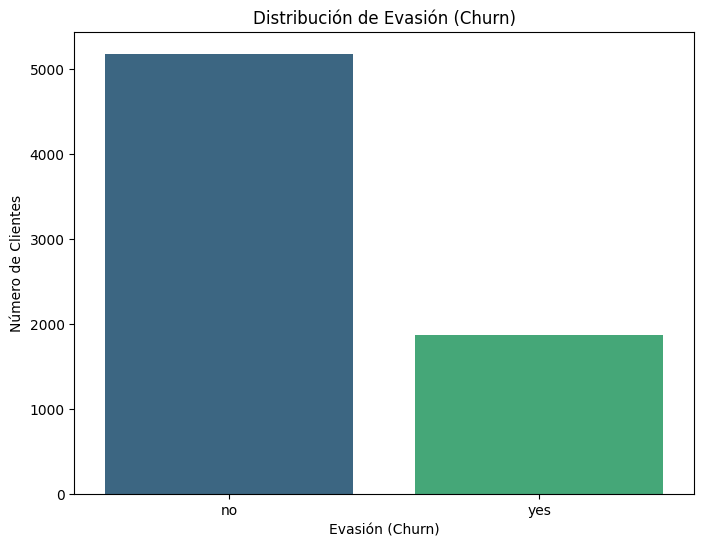

In [58]:
#Ok el siguiente paso es centrano en el Churn graficandolo
import matplotlib.pyplot as plt
import seaborn as sns
#Para un grafico de barras
fig_churn =plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn', palette='viridis')
plt.title('Distribución de Evasión (Churn)')
plt.xlabel('Evasión (Churn)')
plt.ylabel('Número de Clientes')
plt.show()

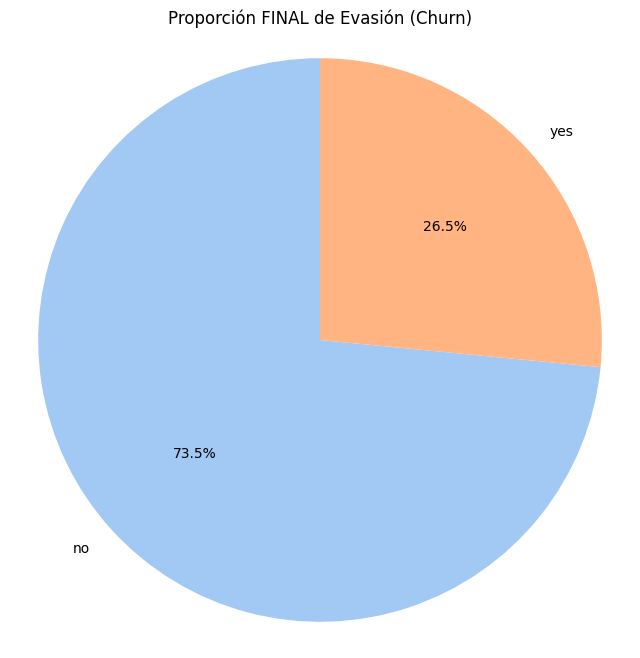

In [60]:
#Otra grfica para otro enfoque
fig_churn2=plt.figure(figsize=(8, 8))
plt.pie(
    df['Churn'].value_counts(),
    labels=df['Churn'].value_counts().index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel')
)
plt.title('Proporción FINAL de Evasión (Churn)')
plt.axis('equal')
plt.show()

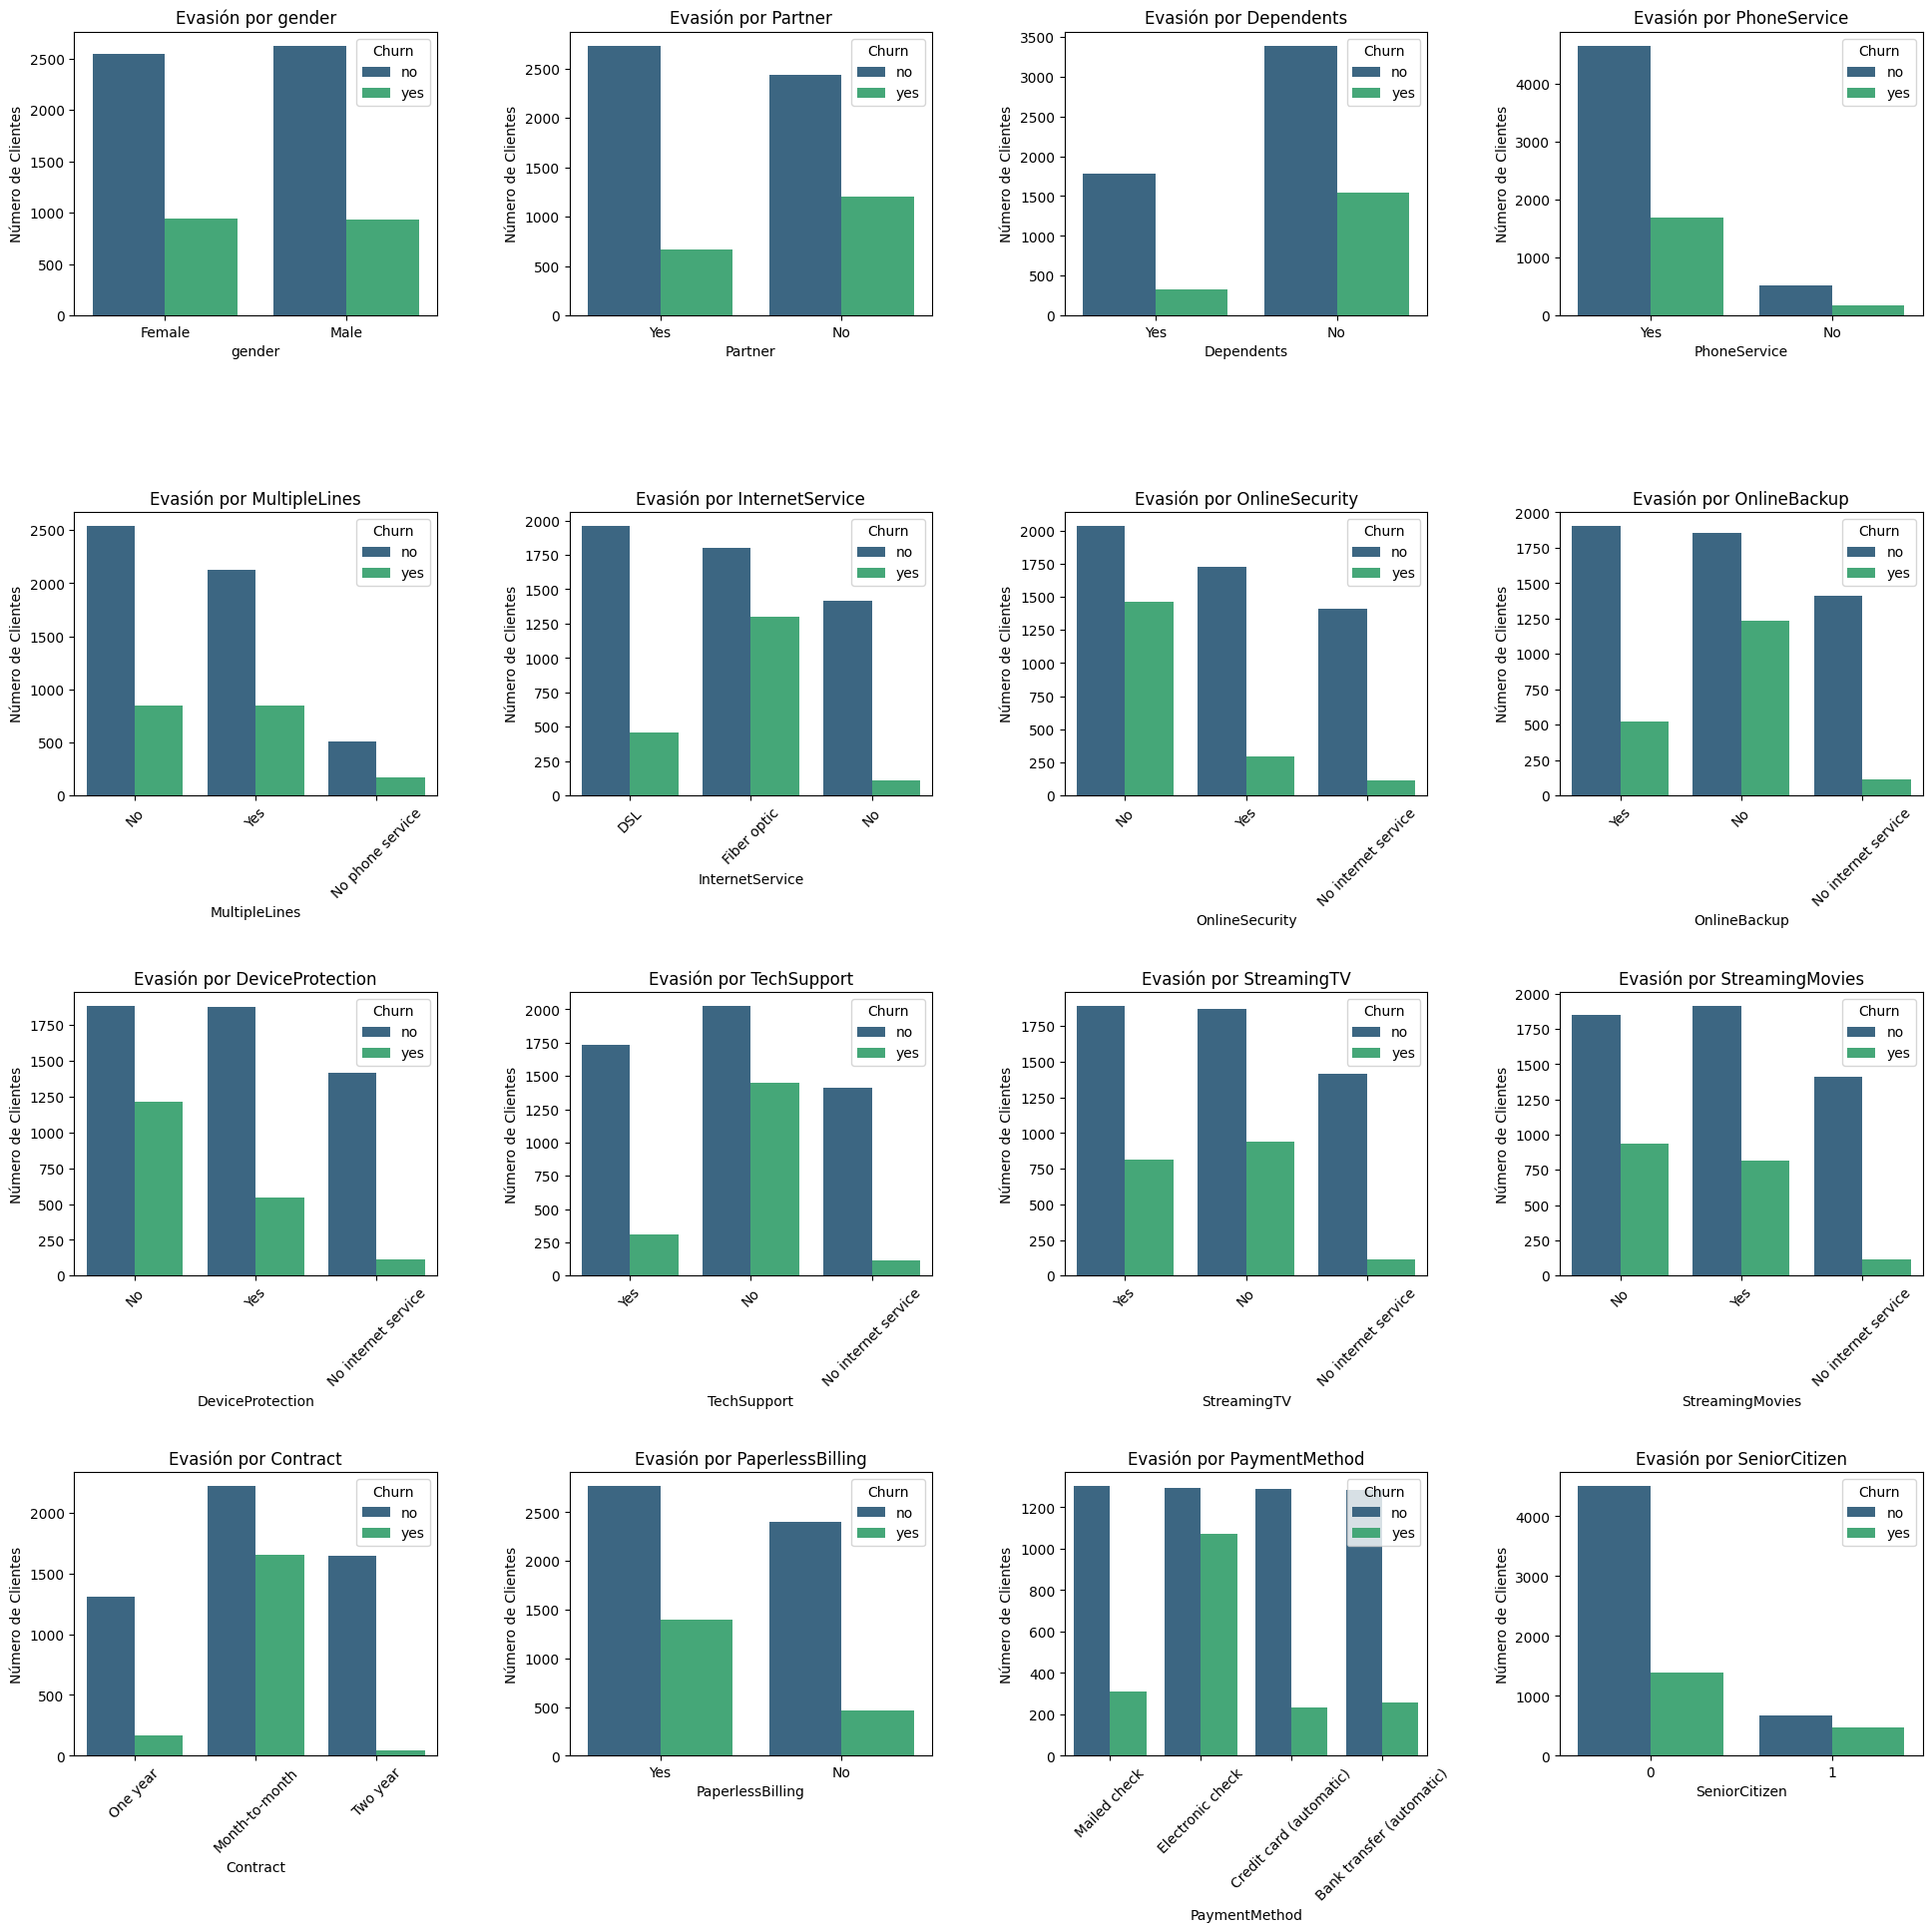


--- Tablas de Contingencia Detalladas (Texto) ---

--- Analizando: 'gender' vs 'Churn' ---

Conteo de clientes por categoría y estado de Churn:
Churn     no  yes
gender           
Female  2549  939
Male    2625  930

Porcentaje de Churn ('yes' y 'no') DENTRO de cada categoría:
Churn      no    yes
gender              
Female  73.08  26.92
Male    73.84  26.16

--- Analizando: 'Partner' vs 'Churn' ---

Conteo de clientes por categoría y estado de Churn:
Churn      no   yes
Partner            
No       2441  1200
Yes      2733   669

Porcentaje de Churn ('yes' y 'no') DENTRO de cada categoría:
Churn       no    yes
Partner              
No       67.04  32.96
Yes      80.34  19.66

--- Analizando: 'Dependents' vs 'Churn' ---

Conteo de clientes por categoría y estado de Churn:
Churn         no   yes
Dependents            
No          3390  1543
Yes         1784   326

Porcentaje de Churn ('yes' y 'no') DENTRO de cada categoría:
Churn          no    yes
Dependents              
No        

In [62]:
# Lista de columnas categóricas (y binarias tratadas como categóricas)
#Para el recuento de evasion por variable categorica
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math # Necesario para calcular el número de filas/columnas

# Lista de NOMBRES de las columnas CATEGÓRICAS
nombres_columnas_categoricas = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen'
]

# Calcular el número de filas y columnas para la cuadrícula de subplots
num_cols = len(nombres_columnas_categoricas)
num_rows = math.ceil(num_cols / 4) # Redondea hacia arriba para asegurar espacio para todos los gráficos
if num_rows == 0: num_rows = 1

# Crear la figura y el conjunto de subplots
fig, axs = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))
axs = axs.flatten()

for i, columna_actual in enumerate(nombres_columnas_categoricas):
    ax = axs[i]

    sns.countplot(data=df, x=columna_actual, hue='Churn', palette='viridis', ax=ax)
    ax.set_title(f'Evasión por {columna_actual}')
    ax.set_xlabel(columna_actual)
    ax.set_ylabel('Número de Clientes')

    # Rotar las etiquetas del eje X si son muy largas para evitar solapamiento
    if len(df[columna_actual].unique()) > 2 or columna_actual in ['PaymentMethod', 'Contract', 'InternetService']:
        # ¡CORRECCIÓN AQUÍ! Eliminado 'ha='right''
        ax.tick_params(axis='x', rotation=45)

# Ocultar los subplots vacíos
for j in range(num_cols, len(axs)):
    fig.delaxes(axs[j])

fig.tight_layout(pad=3.0)
plt.show()

# Imprimir las tablas de contingencia por separado
print("\n--- Tablas de Contingencia Detalladas (Texto) ---")
for columna_actual in nombres_columnas_categoricas:
    print(f"\n--- Analizando: '{columna_actual}' vs 'Churn' ---")
    conteo_churn_por_categoria = pd.crosstab(df[columna_actual], df['Churn'])
    print("\nConteo de clientes por categoría y estado de Churn:")
    print(conteo_churn_por_categoria)

    proporcion_churn_por_categoria = pd.crosstab(df[columna_actual], df['Churn'], normalize='index') * 100
    print("\nPorcentaje de Churn ('yes' y 'no') DENTRO de cada categoría:")
    print(proporcion_churn_por_categoria.round(2))


--- Análisis de Evasión por Variables Numéricas ---

--- Analizando: 'tenure' vs 'Churn' ---

Estadísticas descriptivas de 'tenure' agrupadas por Churn:
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
no     5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0

--- Analizando: 'Monthly' vs 'Churn' ---

Estadísticas descriptivas de 'Monthly' agrupadas por Churn:
        count       mean        std    min    25%     50%   75%     max
Churn                                                                  
no     5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
yes    1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35

--- Analizando: 'Total' vs 'Churn' ---

Estadísticas descriptivas de 'Total' agrupadas por Churn:
        count         mean          std    min      25%      50%       75%  \
Churn              

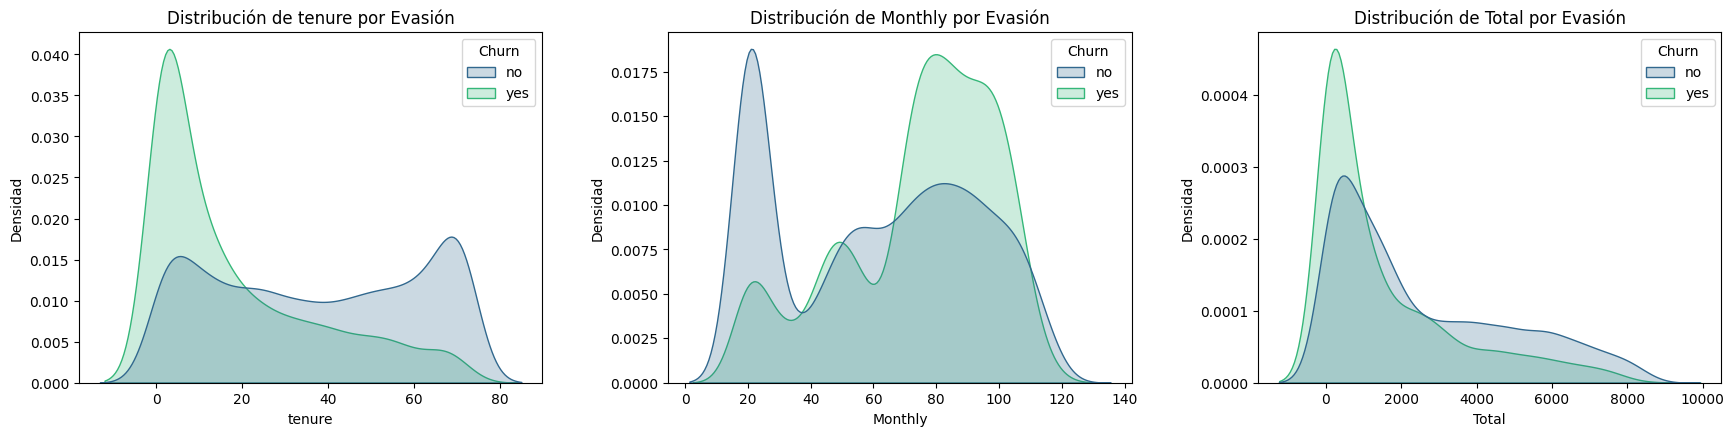

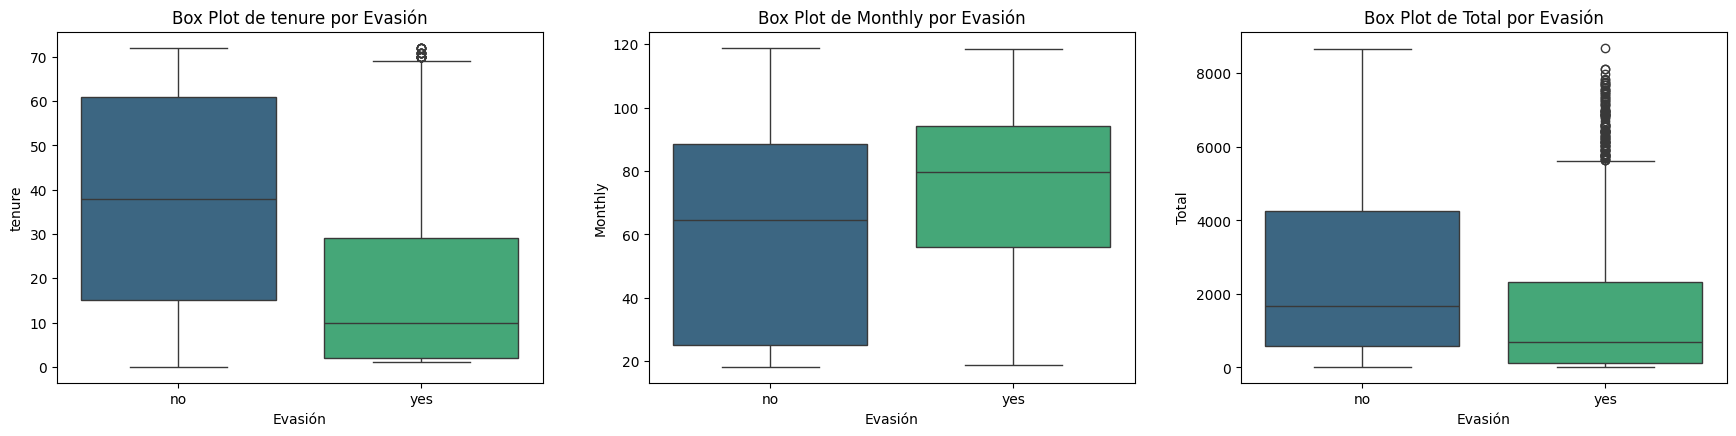

In [64]:
# Lista de columnas numéricas que vamos a analizar con 'Churn'
columnas_numericas = ['tenure', 'Monthly', 'Total']

print("--- Análisis de Evasión por Variables Numéricas ---")

# Calcular el número de filas y columnas para la cuadrícula de subplots de KDE y Box Plots
num_variables = len(columnas_numericas)
num_filas_plots = 1 # Queremos una sola fila para cada tipo de gráfico (KDE y Box Plot)
num_columnas_plots = num_variables # Tendremos 3 columnas de gráficos

# Crear la figura y el conjunto de subplots para los KDE Plots
fig_kde, axs_kde = plt.subplots(num_filas_plots, num_columnas_plots, figsize=(6 * num_columnas_plots, 5))
# Aplanar axs en caso de que sea un array 2D (ej. 1 fila, 3 columnas)
# Si solo hay una variable, axs_kde no sería un array, así que lo manejamos
if num_variables == 1:
    axs_kde = [axs_kde]
else:
    axs_kde = axs_kde.flatten()

# Crear la figura y el conjunto de subplots para los Box Plots
fig_box, axs_box = plt.subplots(num_filas_plots, num_columnas_plots, figsize=(6 * num_columnas_plots, 5))
if num_variables == 1:
    axs_box = [axs_box]
else:
    axs_box = axs_box.flatten()


for i, columna_actual in enumerate(columnas_numericas):
    print(f"\n--- Analizando: '{columna_actual}' vs 'Churn' ---")

    # 1. Estadísticas Descriptivas Agrupadas por Churn
    print(f"\nEstadísticas descriptivas de '{columna_actual}' agrupadas por Churn:")
    # Usamos .describe() para obtener media, std, min, max, cuartiles para cada grupo
    print(df.groupby('Churn')[columna_actual].describe())

    # 2. Visualización con KDE Plot (Gráfico de Densidad del Núcleo)
    # 'hue='Churn'' crea una línea de densidad separada para cada estado de Churn
    # 'fill=True' rellena el área bajo la curva
    # 'common_norm=False' asegura que cada curva se normalice independientemente,
    # lo cual es importante para comparar formas de distribución en clases desequilibradas.
    sns.kdeplot(data=df, x=columna_actual, hue='Churn', fill=True, ax=axs_kde[i], common_norm=False, palette='viridis')
    axs_kde[i].set_title(f'Distribución de {columna_actual} por Evasión')
    axs_kde[i].set_xlabel(columna_actual)
    axs_kde[i].set_ylabel('Densidad')

    # 3. Visualización con Box Plot
    # Muestra la mediana, cuartiles y posibles valores atípicos (outliers)
    sns.boxplot(data=df, x='Churn', y=columna_actual, ax=axs_box[i], palette='viridis', hue='Churn', legend=False)
    axs_box[i].set_title(f'Box Plot de {columna_actual} por Evasión')
    axs_box[i].set_xlabel('Evasión')
    axs_box[i].set_ylabel(columna_actual)


# Ajustar el diseño de ambas figuras para evitar superposiciones
fig_kde.tight_layout(pad=3.0)
fig_box.tight_layout(pad=3.0)

# Mostrar ambas figuras al final
plt.show()

#📄Informe final

#Informe Final: Análisis de Evasión de Clientes (Churn)


---


1. Introducción

Objetivo del Análisis:
El presente informe detalla un análisis exhaustivo de la base de datos de clientes de una empresa de telecomunicaciones, con el objetivo principal de identificar los factores clave que influyen en la evasión de clientes (Churn). Comprender estos factores es fundamental para desarrollar estrategias de retención efectivas y mitigar la pérdida de ingresos.

 El Problema de la Evasión (Churn):
La evasión de clientes, o "Churn", representa un desafío significativo para las empresas de telecomunicaciones. La pérdida de clientes no solo implica una disminución directa de los ingresos, sino que también conlleva costos asociados a la adquisición de nuevos clientes, los cuales suelen ser considerablemente más altos que los costos de retener a los clientes existentes. Identificar proactivamente a los clientes en riesgo de evasión y entender las causas subyacentes es vital para la sostenibilidad y el crecimiento del negocio.

2. Limpieza y Tratamiento de Datos

Para asegurar la calidad y fiabilidad del análisis, se llevaron a cabo los siguientes pasos de limpieza y preprocesamiento de los datos:

**Importación del Dataset:**

El dataset original fue importado desde un archivo en formato JSON a un DataFrame de Pandas.

**Verificación Inicial y Estandarización:**

Se realizó una revisión inicial de los tipos de datos de las columnas y la presencia de valores nulos con métodos como df.info().

Se verificó la existencia de filas duplicadas utilizando la columna customerID, confirmando que no había entradas duplicadas que pudieran sesgar el análisis.

Se estandarizaron los nombres de las columnas (ej. a minúsculas) para facilitar su manejo.

**Manejo de Valores Nulos y Conversión de Tipos:**

Columna 'Total' (Cargos Totales):

*   Se detectó que esta columna, inicialmente de tipo object (cadena de texto), contenía valores en blanco (' ') que representaban ausencias de datos, posiblemente para clientes muy nuevos.
*   Estos espacios en blanco fueron convertidos a valores NaN (Not a Number) para un manejo adecuado por parte de Pandas.
*   Posteriormente, la columna fue convertida al tipo numérico float64 utilizando pd.to_numeric(errors='coerce') para manejar cualquier posible valor no numérico remanente.
*   Finalmente, para mantener la información de clientes que aún no habían acumulado cargos, los NaN restantes en esta columna fueron imputados con el valor 0. Esta decisión se basó en la lógica de que un cliente nuevo tiene "cero" cargos acumulados.

Columna 'Churn' (Evasión):

*   Se estandarizaron sus valores (ej. a minúsculas y se eliminaron espacios alrededor) para asegurar consistencia y facilitar su análisis como variable binaria ('yes' o 'no').
*   Se identificó que contenía cadenas vacías (''), las cuales fueron convertidas a NaN para una mejor representación de datos faltantes.
*   Debido a que Churn es la variable objetivo principal del análisis (la que buscamos predecir o explicar), y no es recomendable imputar valores a la variable que se busca predecir (ya que introduciría un sesgo), las 245 filas que presentaban NaN en Churn fueron eliminadas del dataset. Esta eliminación representó aproximadamente el 3.37% del total de filas originales, una pérdida aceptable para garantizar la integridad y la utilidad de la variable objetivo.

**Otras Columnas:** Se confirmó que otras columnas categóricas como MultipleLines, OnlineSecurity, etc., contenían la categoría 'No internet service' o 'No phone service', lo cual se mantuvo como información válida.



 3. Análisis Exploratorio de Datos

 El Análisis Exploratorio de Datos (EDA) se centró en comprender la distribución de la evasión y su relación con las diversas características de los clientes, tanto categóricas como numéricas.

**Distribución General de la Evasión (Churn)**

Primero, analizamos la proporción general de clientes que evaden versus los que permanecen en el servicio.

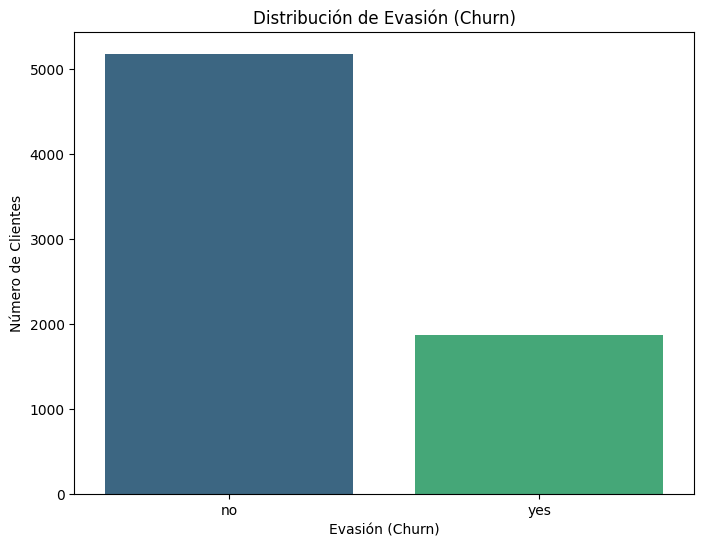

In [59]:
fig_churn


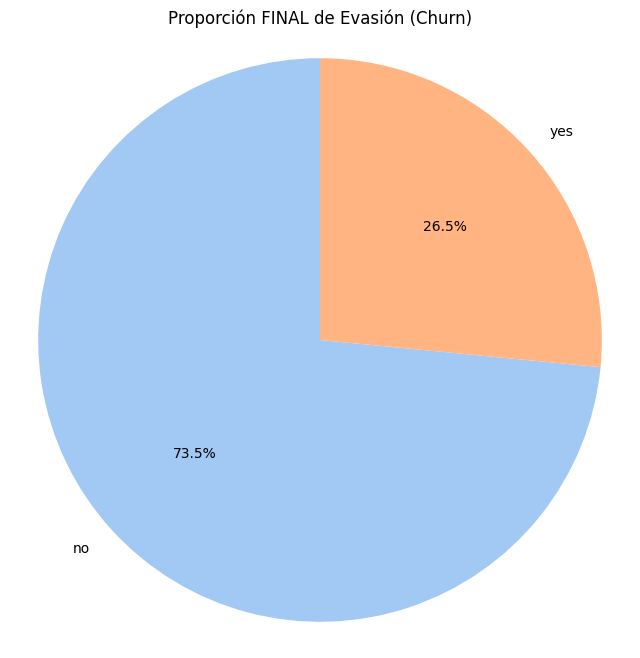

In [61]:
fig_churn2


Observaciones:

Se observa que la clase de "No Evasión" (no) es la mayoritaria, representando aproximadamente el 73.5% de los clientes.

La "Evasión" (yes) representa una proporción significativa del 26.5% del total de clientes. Esto indica un desequilibrio de clases que es importante tener en cuenta si se planifican modelos predictivos en el futuro, ya que las clases minoritarias suelen ser más difíciles de predecir.

**Recuento de Evasión por Variables Categóricas**

Se exploró la relación entre la evasión y diversas variables categóricas, analizando los conteos y las tasas de evasión dentro de cada categoría.

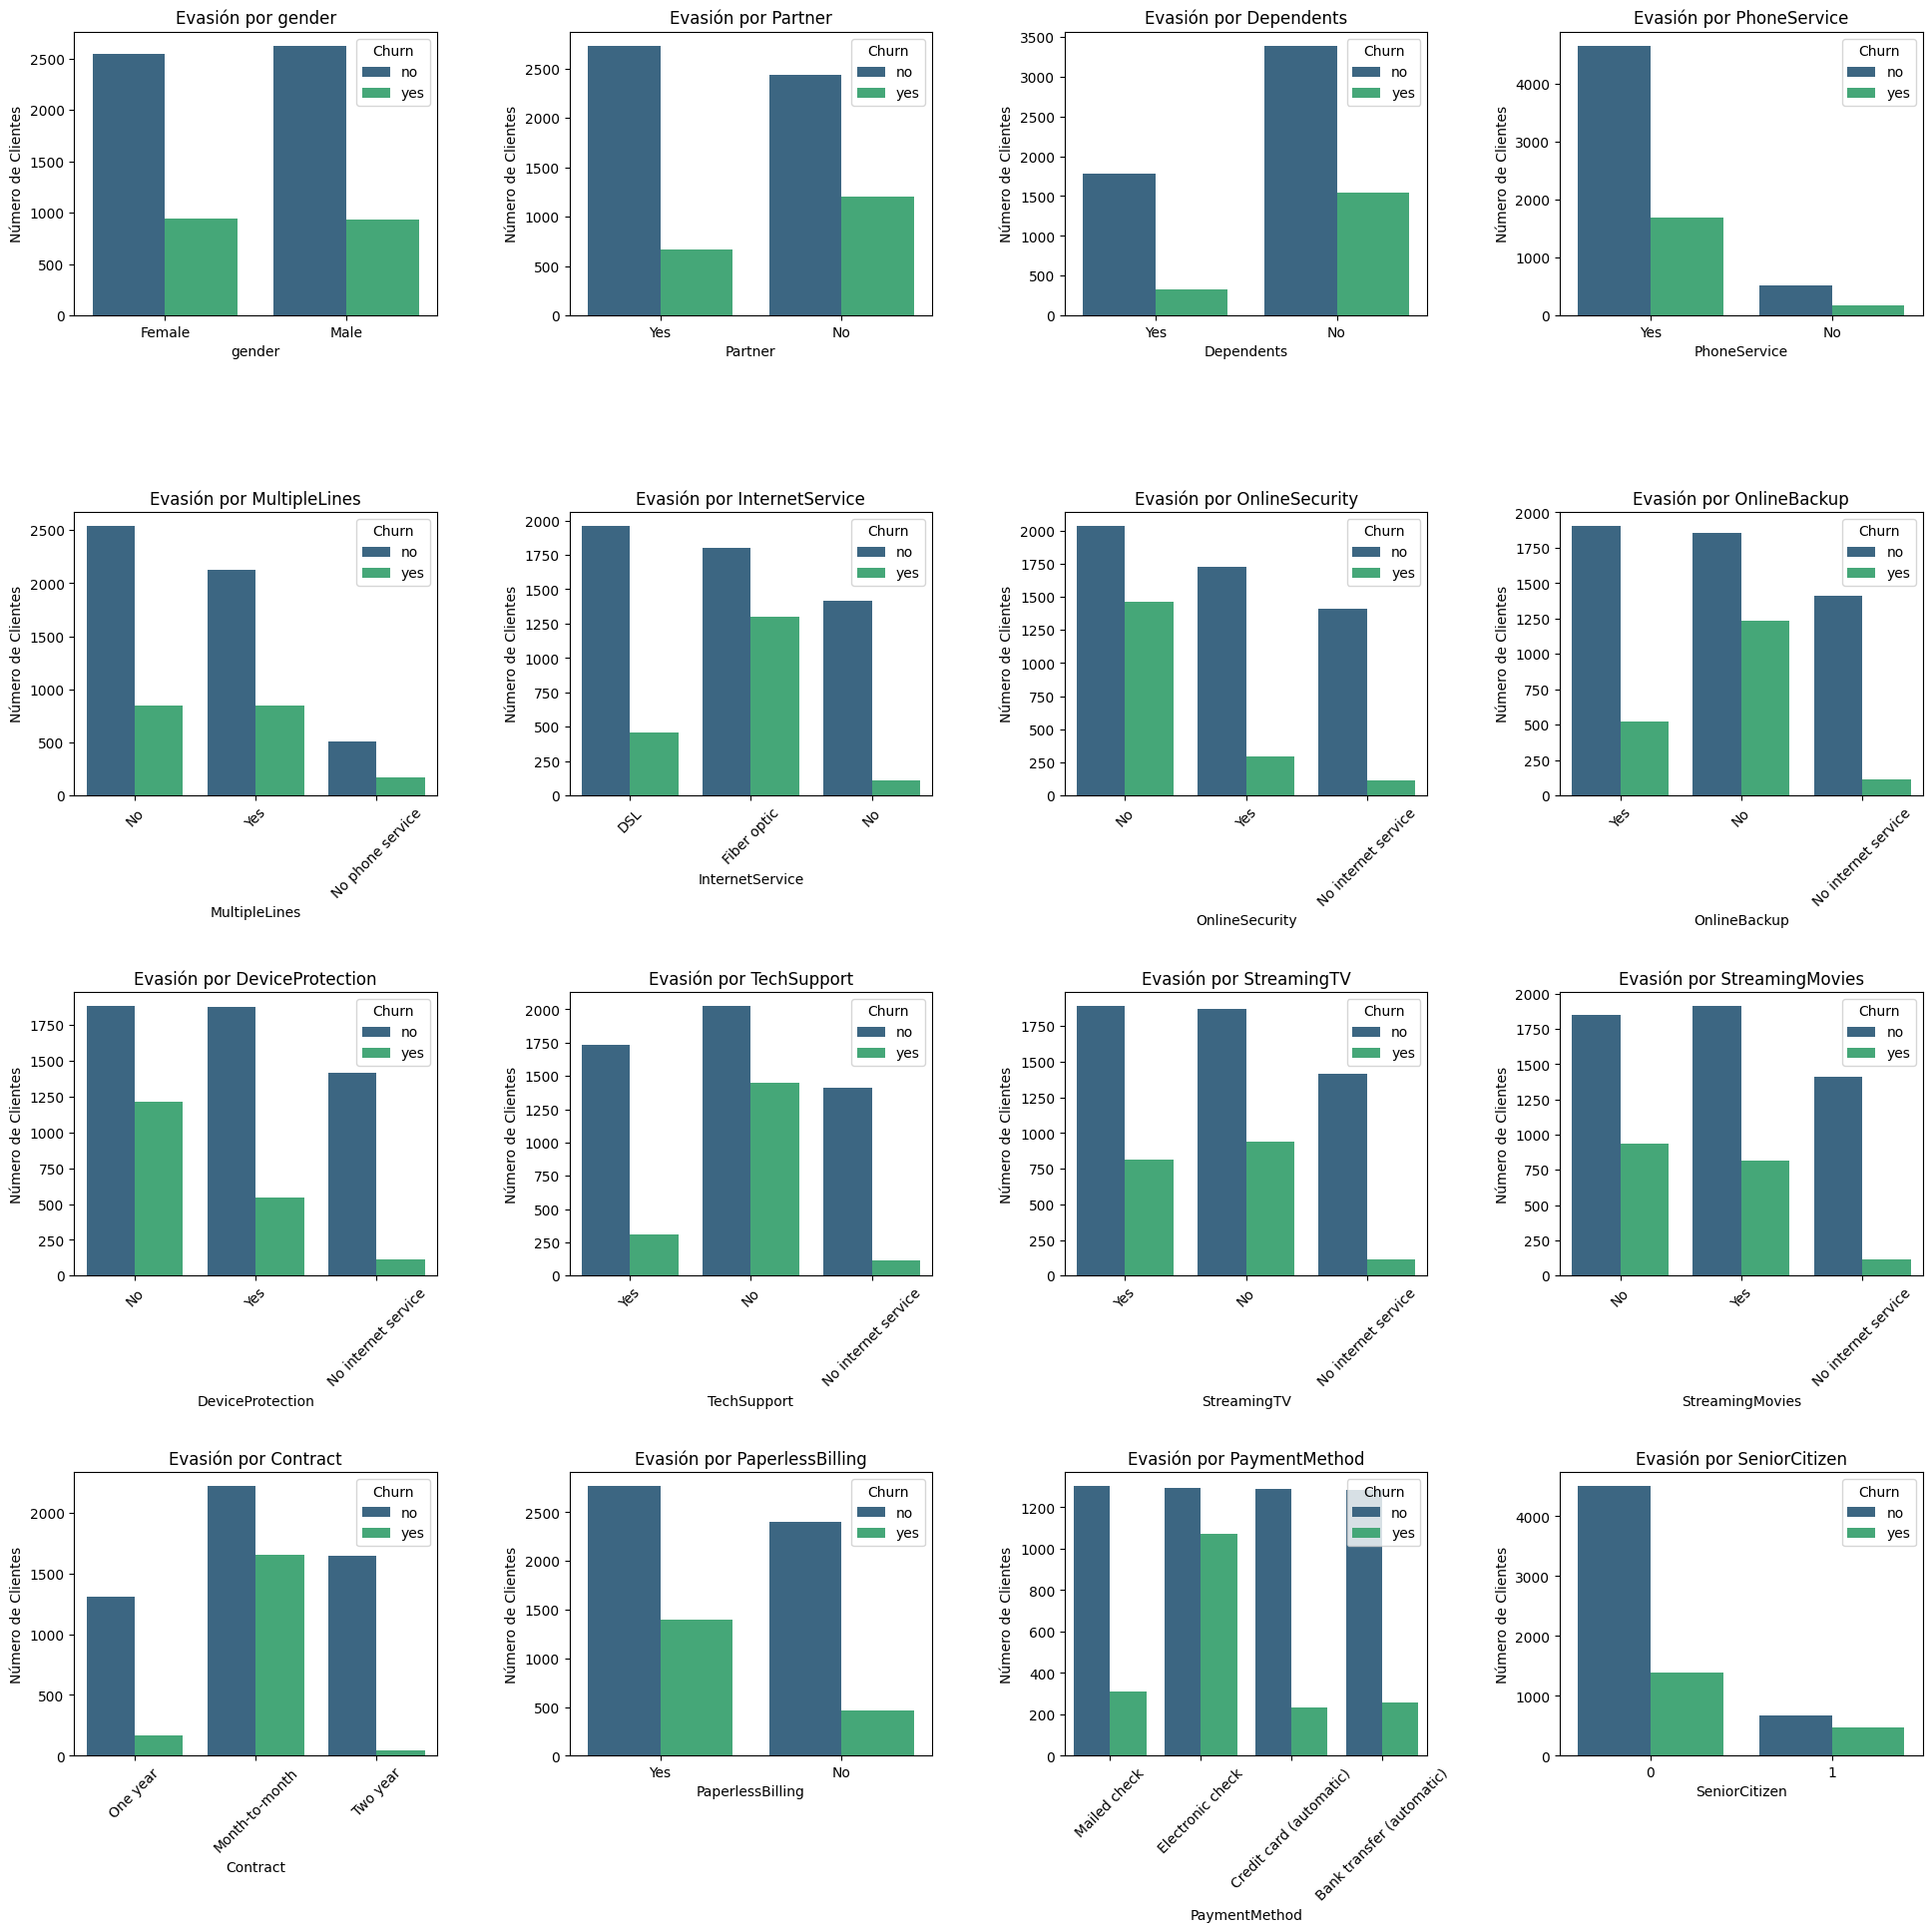

In [63]:
fig


Hallazgos Clave por Variable Categórica:


---


-gender (Género) y PhoneService (Servicio Telefónico):

Insight: Muestran tasas de evasión muy similares entre sus categorías (e.g., hombres vs. mujeres, con teléfono vs. sin teléfono).

Conclusión: No parecen ser factores significativos para diferenciar entre clientes que evaden y los que no.


---


-Partner (Pareja) y Dependents (Dependientes):

Insight: Clientes sin pareja o sin dependientes tienen una tasa de evasión considerablemente más alta (aprox. 33% para 'No Partner', 31% para 'No Dependents') en comparación con aquellos que sí los tienen (aprox. 20% para 'Partner', 15% para 'Dependents').

Conclusión: La presencia de un compañero o dependientes sugiere una mayor estabilidad y lealtad, posiblemente debido a planes compartidos o un mayor apego al servicio familiar.


---


-InternetService (Servicio de Internet):

Insight: Los clientes con servicio de Fibra Óptica (Fiber optic) presentan una tasa de evasión alarmantemente alta (41.89%), más del doble que los de DSL (18.96%). Aquellos sin servicio de internet son los más estables (7.40%).

Conclusión: Este es un factor crítico. Indica posibles problemas de calidad, rendimiento o precio percibido en el servicio de Fibra Óptica que están impulsando la insatisfacción y la evasión.


---


-OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport (Servicios Adicionales de Internet):

Insight: Para todos estos servicios, la ausencia del servicio (No) está fuertemente correlacionada con una mayor tasa de evasión (rondando el 40-42%) en comparación con aquellos que sí los tienen (rondando el 14-22%).

Conclusión: Estos servicios actúan como "ganchos" de lealtad. Ofrecer y promover su uso aumenta la percepción de valor y seguridad, reduciendo la probabilidad de evasión.


---



-Contract (Tipo de Contrato):

Insight: Uno de los predictores más fuertes. Los contratos mes a mes (Month-to-month) tienen una tasa de evasión extremadamente alta (42.71%), mientras que los contratos de un año (11.27%) y especialmente los de dos años (2.83%) demuestran una gran lealtad.

Conclusión: El compromiso a largo plazo a través de un contrato es un factor decisivo en la retención del cliente.


---


-PaperlessBilling (Facturación sin Papel):

Insight: Sorprendentemente, los clientes con facturación sin papel (Yes) tienen una tasa de evasión casi el doble (33.57%) que los que la tienen en papel (16.33%).

Conclusión: Esto es contraintuitivo y podría indicar que los usuarios de estos servicios digitales son más propensos a la portabilidad o que existe una fricción en la experiencia de usuario de la plataforma de facturación digital.


---


-PaymentMethod (Método de Pago):

Insight: El cheque electrónico (Electronic check) se asocia con una tasa de evasión muy elevada (45.29%), siendo el método de pago más riesgoso. Los métodos automáticos (transferencia bancaria, tarjeta de crédito) tienen tasas de evasión mucho más bajas (15-17%).

Conclusión: Este método de pago en particular podría indicar una mayor inestabilidad financiera del cliente, o simplemente que es menos "pegajoso" que los pagos automáticos.


---



-SeniorCitizen (Ciudadano de Tercera Edad):

Insight: Los clientes de tercera edad (1) tienen una tasa de evasión considerablemente más alta (41.68%) que los no seniors (23.61%).

Conclusión: Este segmento demográfico podría tener necesidades específicas o experimentar desafíos con los servicios que los hacen más propensos a evadir.

**Recuento de Evasión por Variables Numéricas**

Se examinó cómo las variables numéricas como el tiempo de contrato (tenure), los cargos mensuales (Monthly) y los cargos totales (Total) se distribuyen entre los clientes que evaden y los que no.

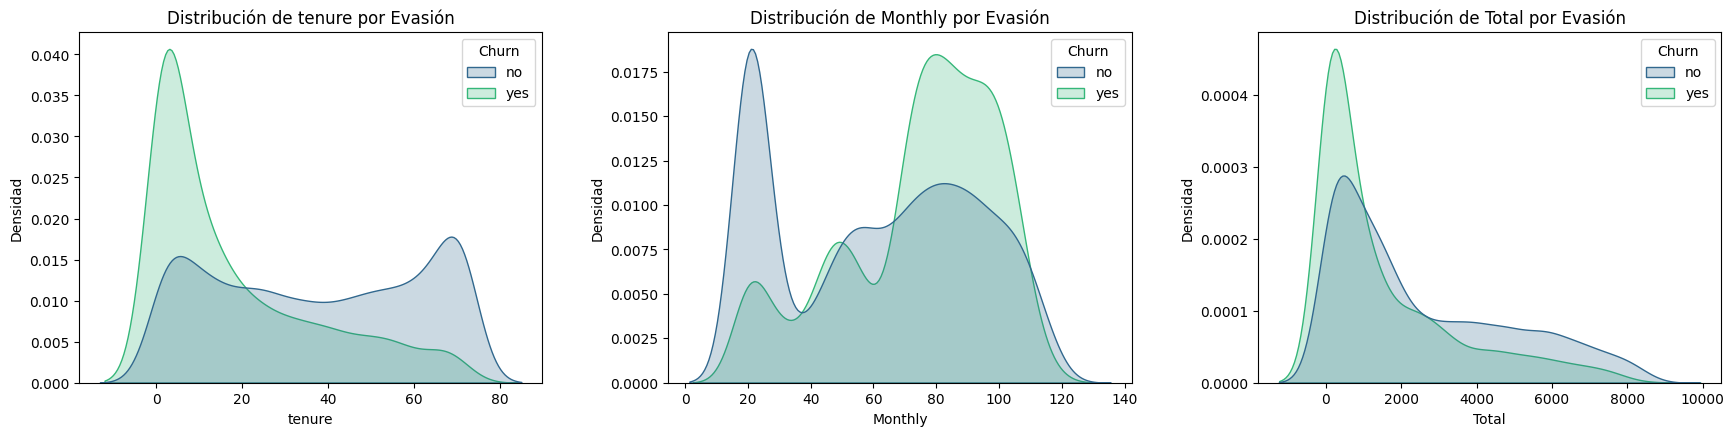

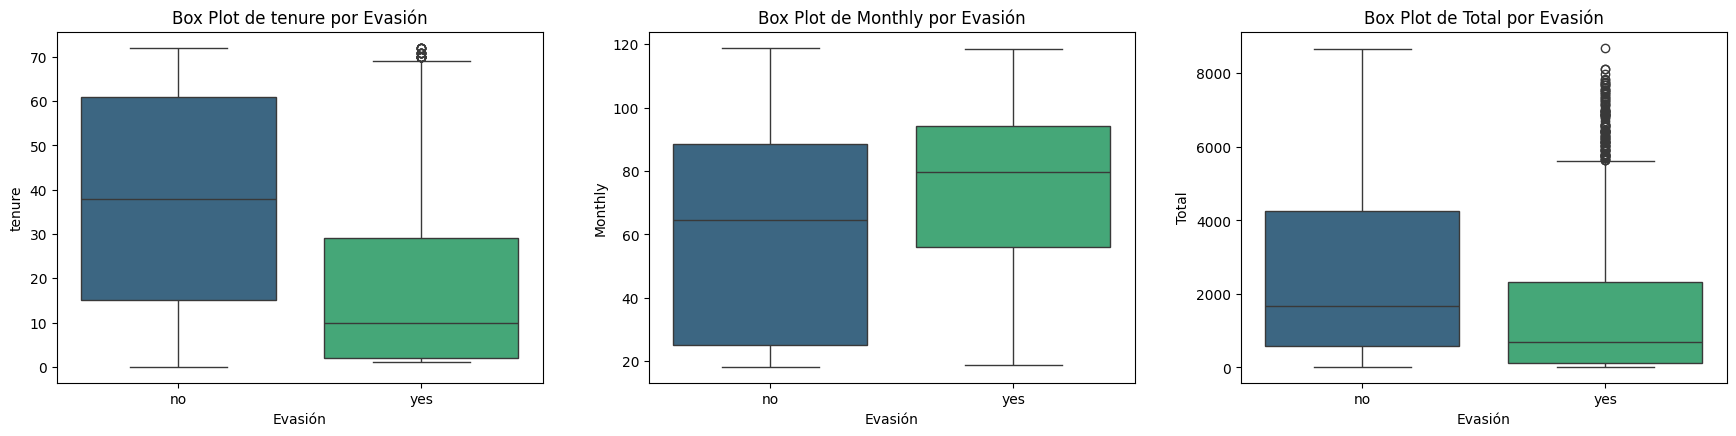

In [72]:
# Primero, importa la función display
from IPython.display import display

# Para volver a mostrarlo junto

display(fig_kde) # Muestra la figura con los KDE plots
display(fig_box) # Muestra la figura con los Box plots

Hallazgos Clave por Variable Numérica:

---


-tenure (Tiempo de Contrato):

Insight: Existe una diferencia drástica en la antigüedad de los clientes. Los clientes que evaden tienen un tiempo de contrato promedio (aprox. 18 meses) y mediana (aprox. 10 meses) mucho menor que los que no evaden (media de aprox. 37.5 meses, mediana de aprox. 38 meses).

Conclusión: La mayoría de las evasiones ocurren en las etapas iniciales de la relación con el cliente. La lealtad aumenta significativamente con la antigüedad.


---


-Monthly (Cargos Mensuales):

Insight: Los clientes que evaden presentan cargos mensuales promedio y medianos más altos (aprox. 74.4) en comparación con los que no evaden (aprox. 61.3).

Conclusión: Un mayor gasto mensual podría estar asociado con una mayor sensibilidad al precio o una menor satisfacción con la relación valor-costo, impulsando la evasión.


---
-Total (Cargos Totales):

Insight: Similar a tenure, los clientes que evaden tienen un total de cargos promedio y mediano mucho menor (aprox. 1531) que los que no evaden (aprox. 2555).

Conclusión: Esto refuerza la idea de que los clientes de corto plazo y con menos historial acumulado de gastos son los más propensos a irse, ya que no han tenido tiempo de acumular grandes cargos totales.



 4. Conclusiones e Insights

 A partir del análisis exploratorio de datos, se extraen las siguientes conclusiones e insights clave que resumen los principales patrones identificados y cómo estos datos pueden ayudar a reducir la evasión:

*   La evasión se concentra fuertemente en las etapas tempranas de la relación con el cliente (baja antigüedad/tenure) y en aquellos con contratos mes a mes. Esto indica una ventana de oportunidad crítica para la intervención.
*   La Experiencia de Servicio es Clave para Ofertas Premium/Digitales: Hay una alta correlación entre la evasión y el uso de Fibra Óptica, Cheque Electrónico y Facturación sin Papel. Esto sugiere que, si bien estos servicios son modernos, podrían estar generando fricciones o no cumpliendo las expectativas de los clientes, lo que los lleva a buscar alternativas.
*   El Valor Añadido Reduce el Riesgo: La inclusión de servicios de seguridad y soporte (como OnlineSecurity o TechSupport) y la presencia de Partner o Dependents están asociados con una mayor lealtad. Estos elementos aumentan la "pegajosidad" del cliente al servicio.
*   Costos y Expectativas: Los clientes con cargos mensuales más altos son más propensos a evadir, lo que subraya la importancia de una propuesta de valor clara y competitiva para segmentos de alto gasto.
*   Segmentos Vulnerables Específicos: Los clientes de tercera edad (SeniorCitizen) presentan una tasa de evasión elevada, indicando la necesidad de estrategias de retención especializadas para este grupo.


5. Recomendaciones Estratégicas

Basado en los hallazgos detallados del análisis, se proponen las siguientes recomendaciones estratégicas y accionables para que la empresa pueda mitigar la evasión de clientes:

---

-Implementar un Programa de Retención Temprana:

Acción: Desarrollar un programa proactivo de bienvenida y seguimiento intensivo para clientes en los primeros 3 a 6 meses de servicio. Esto podría incluir llamadas de cortesía, guías personalizadas de uso de servicios, y encuestas de satisfacción rápidas para identificar y resolver problemas incipientes.

Objetivo: Reducir la alta tasa de evasión en clientes nuevos y con bajo tenure.

---

-Incentivar la Migración a Contratos de Mayor Duración:

Acción: Crear ofertas atractivas (ej., descuentos, beneficios adicionales, upgrades gratuitos) para persuadir a los clientes con contratos mes a mes a cambiarse a contratos de uno o dos años.

Objetivo: Aumentar el compromiso del cliente y aprovechar el efecto de lealtad de los contratos a largo plazo.

---

-Investigar y Mejorar la Experiencia con Fibra Óptica:

Acción: Realizar un estudio de causa raíz sobre la alta evasión en el segmento de Fibra Óptica. Esto debe incluir encuestas de satisfacción específicas, monitoreo de la calidad del servicio, análisis de la red, y una revisión competitiva de precios y características.

Objetivo: Abordar las causas de insatisfacción en un servicio clave con alta rotación.

---

-Promoción Activa de Servicios de Valor Añadido:

Acción: Intensificar las campañas de marketing y ventas para los servicios de seguridad en línea (OnlineSecurity), respaldo (OnlineBackup), protección de dispositivos (DeviceProtection) y soporte técnico (TechSupport). Considerar ofrecer pruebas gratuitas o paquetes de inicio.

Objetivo: Aumentar la adopción de estos servicios, ya que actúan como "ganchos" de lealtad.

---

-Optimizar la Experiencia de Pagos Digitales:

Acción: Analizar y mejorar el proceso de pago mediante cheque electrónico para reducir cualquier fricción o problema que pueda estar contribuyendo a la evasión.

Acción: Considerar estrategias para incentivar la adopción de métodos de pago automáticos (tarjeta de crédito, transferencia bancaria), que se asocian con menor evasión.

Objetivo: Minimizar la evasión asociada a problemas o fricciones en los métodos de pago.

---

-Desarrollar Estrategias Personalizadas para Segmentos Vulnerables:

Acción: Diseñar ofertas de valor, canales de comunicación y soporte al cliente específicos para los clientes de tercera edad (SeniorCitizen), que se adapten a sus necesidades y preferencias.

Objetivo: Reducir la alta tasa de evasión en este segmento demográfico.

---

-Reevaluar la Experiencia de Facturación sin Papel:

Acción: Investigar por qué la facturación sin papel se asocia con mayor evasión. Podría haber oportunidades para mejorar la usabilidad de la plataforma digital, la claridad de los extractos o la comunicación de valor a través de este canal.

Objetivo: Convertir una característica aparentemente conveniente en un factor de lealtad.